In [ ]:
from google.colab import files
uploaded = files.upload()


Saving realistic_kraljic_dataset.csv to realistic_kraljic_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("realistic_kraljic_dataset.csv")
df.head()


,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [ ]:
import os
os.listdir()


['.config',
 'realistic_kraljic_dataset.csv (1).csv',
 'realistic_kraljic_dataset.csv.csv',
 'realistic_kraljic_dataset.csv',
 'sample_data']

In [ ]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


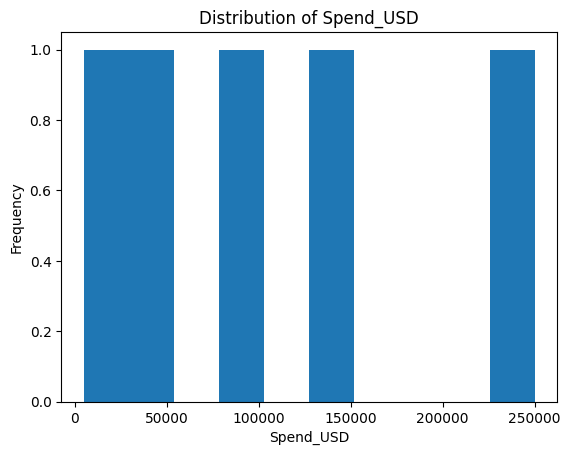

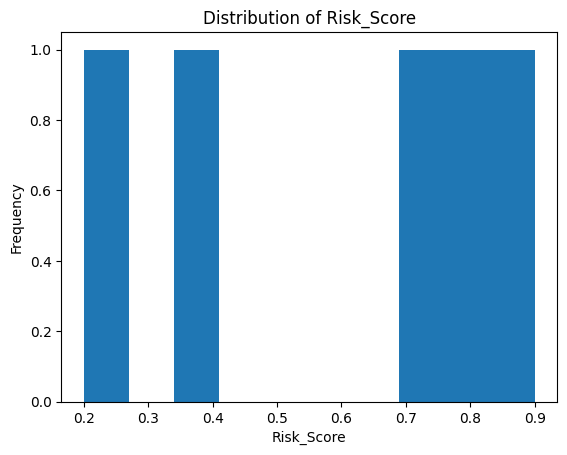

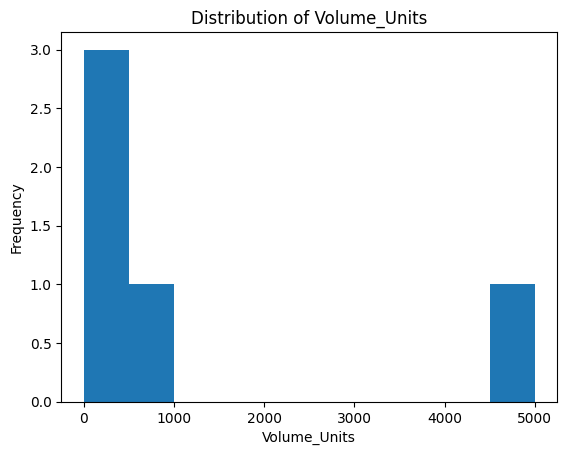

In [ ]:
numeric_cols = [S
    'Spend_USD',
    'Risk_Score',
    'Volume_Units'
]

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

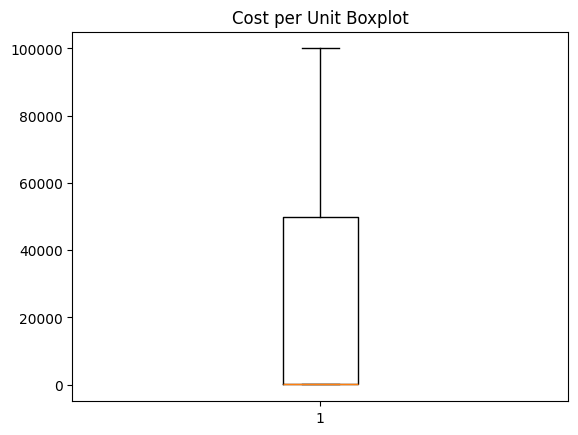

In [ ]:
df['Cost_per_Unit'] = df['Spend_USD'] / df['Volume_Units']
plt.boxplot(df['Cost_per_Unit'])
plt.title("Cost per Unit Boxplot")
plt.show()

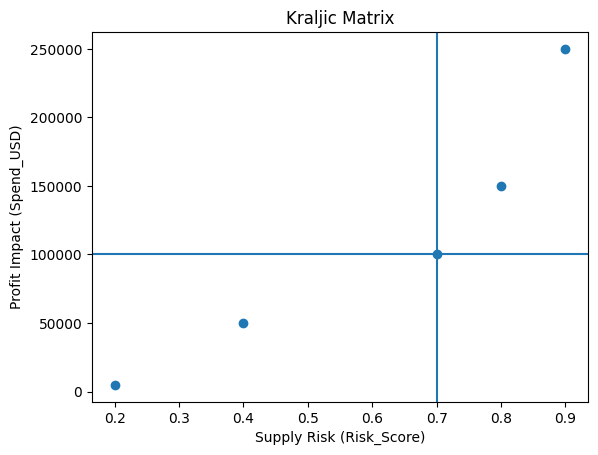

In [ ]:
plt.figure()
plt.scatter(df['Risk_Score'], df['Spend_USD'])
plt.axhline(y=spend_median)
plt.axvline(x=risk_median)
plt.xlabel("Supply Risk (Risk_Score)")
plt.ylabel("Profit Impact (Spend_USD)")
plt.title("Kraljic Matrix")
plt.show()

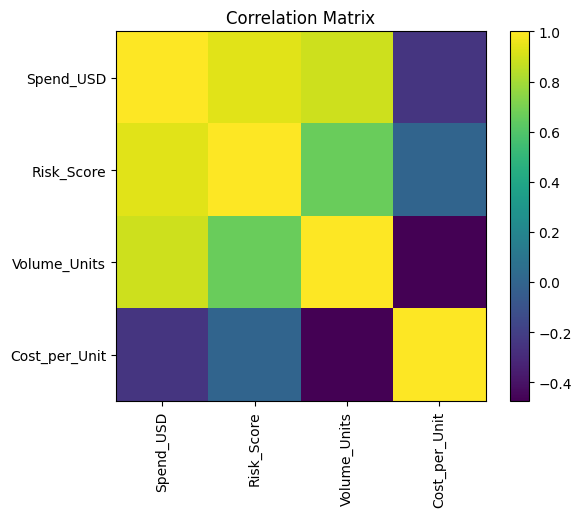

In [ ]:
numeric_df = df[['Spend_USD', 'Risk_Score', 'Volume_Units', 'Cost_per_Unit']]
corr = numeric_df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

<Figure size 640x480 with 0 Axes>

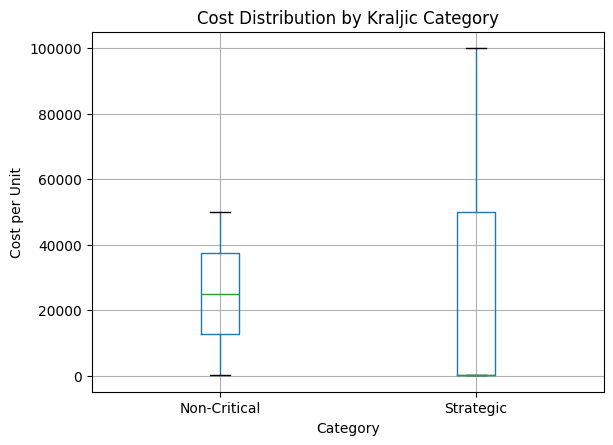

In [ ]:
plt.figure()
df.boxplot(column='Cost_per_Unit', by='Kraljic_Category')
plt.title("Cost Distribution by Kraljic Category")
plt.suptitle("")
plt.xlabel("Category")
plt.ylabel("Cost per Unit")
plt.show()


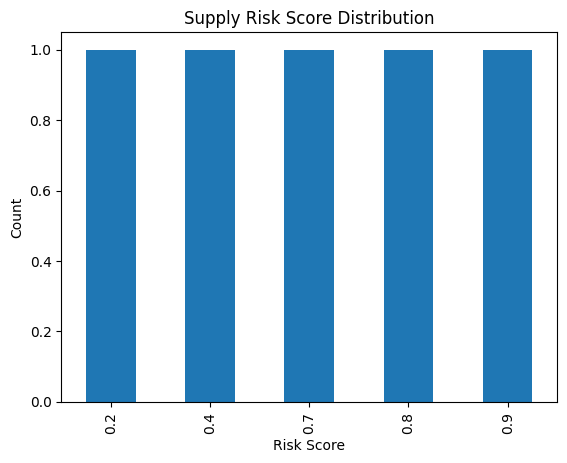

In [ ]:
plt.figure()
df['Risk_Score'].value_counts().sort_index().plot(kind='bar')
plt.title("Supply Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

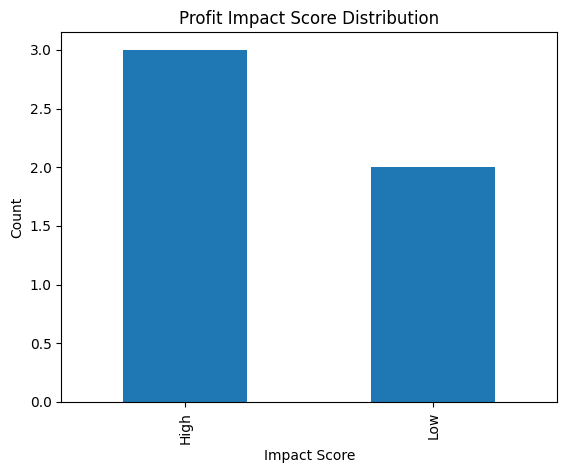

In [ ]:
spend_median = df['Spend_USD'].median()
df['Profit_Impact_Score'] = df['Spend_USD'].apply(lambda x: 'High' if x >= spend_median else 'Low')

plt.figure()
df['Profit_Impact_Score'].value_counts().sort_index().plot(kind='bar')
plt.title("Profit Impact Score Distribution")
plt.xlabel("Impact Score")
plt.ylabel("Count")
plt.show()

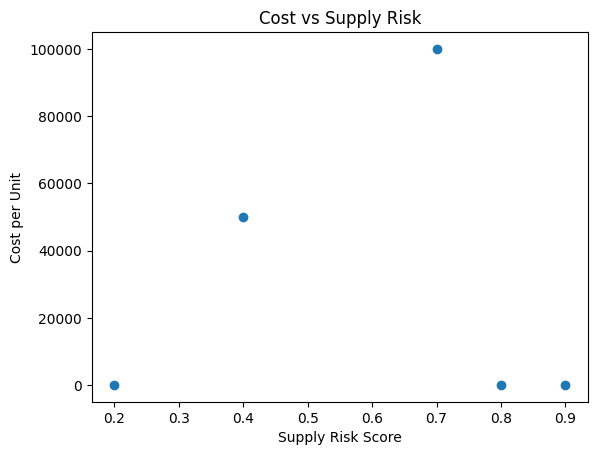

In [ ]:
plt.figure()
plt.scatter(df['Risk_Score'], df['Cost_per_Unit'])
plt.xlabel("Supply Risk Score")
plt.ylabel("Cost per Unit")
plt.title("Cost vs Supply Risk")
plt.show()

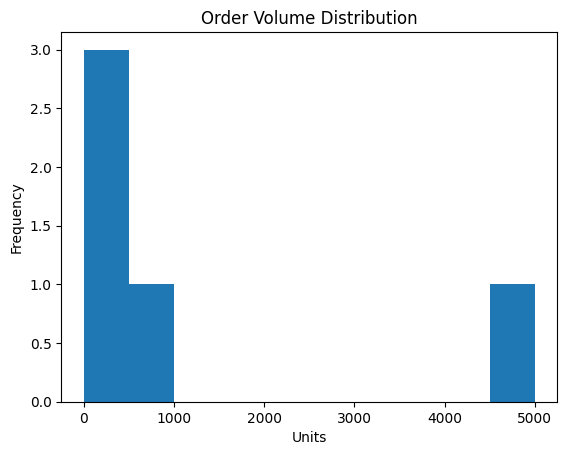

In [ ]:
plt.figure()
plt.hist(df['Volume_Units'])
plt.title("Order Volume Distribution")
plt.xlabel("Units")
plt.ylabel("Frequency")
plt.show()

# ***Summery***
Performed exploratory data analysis (EDA) on a Kraljic Matrix–based supply chain dataset using Python (Pandas, NumPy, Matplotlib). Analyzed cost, lead time, order volume, supply risk, and profit impact to identify sourcing patterns. Visualized risk–profit relationships and supplier segmentation using the Kraljic framework. Derived actionable insights for cost optimization, risk mitigation, and supplier strategy.